<h1>Array-Oriented Programming with Arrays</h1>

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is referred to by some people as vectorization. In general, vectorized array operations will usually be significantly faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.

As a simple example, suppose we wished to evaluate the function `sqrt(x^2 + y^2)` across a regular grid of values. The `numpy.meshgrid` function takes two one-dimensional arrays and produces two two-dimensional matrices corresponding to all pairs of `(x, y)` in the two arrays:

In [1]:
import numpy as np

In [2]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points

xs, ys = np.meshgrid(points, points)

ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points:

In [3]:
z = np.sqrt(xs ** 2 + ys ** 2)

z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

I use matplotlib to create visualizations of this two-dimensional array:

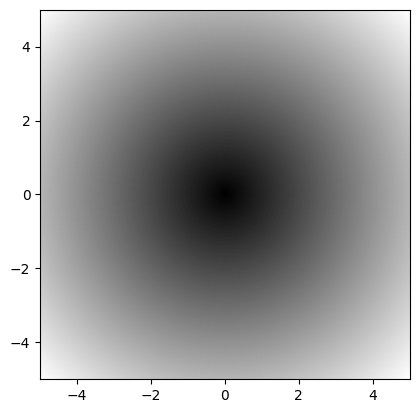

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])

In [5]:
plt.close("all")

<h2>Expressing Conditional Logic as Array Operations</h2>

The `numpy.where` function is a vectorized version of the ternary expression `x if condition else y`. Suppose we had a Boolean array and two arrays of values:

In [6]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from `xarr` whenever the corresponding value in `cond` is `True`, and otherwise take the value from `yarr`. A list comprehension doing this might look like:

In [7]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, `it will not be very fast for large arrays` (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With `numpy.where` you can do this with a single function call:

In [8]:
result = np.where(cond, xarr, yarr)

result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to `numpy.where` don’t need to be arrays; one or both of them can be scalars. A typical use of `where` in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is possible to do with `numpy.where`:

In [9]:
rng = np.random.default_rng(seed=12345)

In [10]:
arr = rng.standard_normal((4, 4))

arr

array([[-1.42382504,  1.26372846, -0.87066174, -0.25917323],
       [-0.07534331, -0.74088465, -1.3677927 ,  0.6488928 ],
       [ 0.36105811, -1.95286306,  2.34740965,  0.96849691],
       [-0.75938718,  0.90219827, -0.46695317, -0.06068952]])

In [11]:
arr > 0

array([[False,  True, False, False],
       [False, False, False,  True],
       [ True, False,  True,  True],
       [False,  True, False, False]])

In [12]:
np.where(arr > 0, 2, -2)

array([[-2,  2, -2, -2],
       [-2, -2, -2,  2],
       [ 2, -2,  2,  2],
       [-2,  2, -2, -2]])


You can combine scalars and arrays when using `numpy.where`. For example, I can replace all positive values in `arr` with the constant 2, like so:

In [13]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-1.42382504,  2.        , -0.87066174, -0.25917323],
       [-0.07534331, -0.74088465, -1.3677927 ,  2.        ],
       [ 2.        , -1.95286306,  2.        ,  2.        ],
       [-0.75938718,  2.        , -0.46695317, -0.06068952]])

<h2>Mathematical and Statistical Methods</h2>

A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (sometimes called reductions) like `sum, mean`, and `std` (standard deviation) either by calling the array instance method or using the top-level NumPy function. When you use the NumPy function, like `numpy.sum`, you have to pass the array you want to aggregate as the first argument.

Here I generate some normally distributed random data and compute some aggregate statistics:

In [14]:
arr = rng.standard_normal((5, 4))

arr

array([[ 0.78884434, -1.25666813,  0.57585751,  1.39897899],
       [ 1.32229806, -0.29969852,  0.90291934, -1.62158273],
       [-0.15818926,  0.44948393, -1.34360107, -0.08168759],
       [ 1.72473993,  2.61815943,  0.77736134,  0.8286332 ],
       [-0.95898831, -1.20938829, -1.41229201,  0.54154683]])

In [15]:
arr.mean()

0.17933634979615845

In [16]:
np.mean(arr)

0.17933634979615845

In [17]:
np.mean(arr)

0.17933634979615845

Functions like `mean` and `sum` take an optional `axis` argument that computes the statistic over the given axis, resulting in an array with one less dimension:

In [18]:
arr.mean(axis=1)

array([ 0.37675318,  0.07598404, -0.2834985 ,  1.48722347, -0.75978045])

In [19]:
arr.sum(axis=0)

array([ 2.71870476,  0.30188842, -0.49975489,  1.0658887 ])

Here, `arr.mean(axis=1)` means "compute mean across the columns," where `arr.sum(axis=0)` means "compute sum down the rows."

Other methods like `cumsum` and `cumprod` do not aggregate, instead producing an array of the intermediate results:

In [20]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like `cumsum` return an array of the same size but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [21]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

The expression `arr.cumsum(axis=0)` computes the cumulative sum along the rows,
 while `arr.cumsum(axis=1)` computes the sums along the columns:

In [22]:
arr.cumsum(axis=0)

arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

<b>Note:</b> See NumPy basic array statistical methods in this <a href="https://numpy.org/doc/stable/reference/routines.statistics.html">link</a>.

<h2>Methods for Boolean Arrays</h2>

Boolean values are coerced to 1 (`True`) and 0 (`False`) in the preceding methods. Thus, `sum` is often used as a means of counting `True` values in a Boolean array:

In [23]:
arr = rng.standard_normal(100)

(arr > 0).sum() # Number of positive values

51

In [24]:
(arr <= 0).sum() # Number of non-positive values

49

The parentheses here in the expression `(arr > 0).sum()` are necessary to be able to call `sum()` on the temporary result of `arr > 0`.

Two additional methods, `any` and `all`, are useful especially for Boolean arrays. `any` tests whether one or more values in an array is `True`, while `all` checks if every value is `True`:

In [25]:
bools = np.array([False, False, True, False])

bools.any()

True

In [26]:
bools.all()

False

These methods also work with non-Boolean arrays, where nonzero elements are treated as `True`.

<h2>Sorting</h2>

Like Python’s built-in list type, NumPy arrays can be sorted in place with the `sort` method:

In [27]:
arr = rng.standard_normal(6)

arr

array([ 0.28208603, -0.62361213,  1.12182226,  0.84122103, -0.7758961 ,
        0.41071644])

In [28]:
arr.sort()

arr

array([-0.7758961 , -0.62361213,  0.28208603,  0.41071644,  0.84122103,
        1.12182226])

You can sort each one-dimensional section of values in a multidimensional array in place along an axis by passing the axis number to `sort`. In this example data:

In [29]:
arr = rng.standard_normal((5, 3))

arr

array([[-2.7224161 , -0.6733048 ,  1.24622153],
       [ 0.79020803,  0.17534089, -0.0292946 ],
       [-1.41951426, -1.35996632,  0.22341156],
       [ 1.76177943, -2.17088985,  0.62848817],
       [ 0.60119653,  0.95075786, -0.86924667]])

`arr.sort(axis=0)` sorts the values within each column, 
while `arr.sort(axis=1)` sorts across each row:

In [30]:
arr.sort(axis=0)

arr

array([[-2.7224161 , -2.17088985, -0.86924667],
       [-1.41951426, -1.35996632, -0.0292946 ],
       [ 0.60119653, -0.6733048 ,  0.22341156],
       [ 0.79020803,  0.17534089,  0.62848817],
       [ 1.76177943,  0.95075786,  1.24622153]])

In [31]:

arr.sort(axis=1)

arr

array([[-2.7224161 , -2.17088985, -0.86924667],
       [-1.41951426, -1.35996632, -0.0292946 ],
       [-0.6733048 ,  0.22341156,  0.60119653],
       [ 0.17534089,  0.62848817,  0.79020803],
       [ 0.95075786,  1.24622153,  1.76177943]])

The top-level method `numpy.sort` returns a sorted copy of an array (like the Python built-in function `sorted` ) instead of modifying the array in place. For example:

In [32]:
arr2 = np.array([5, -10, 7, 1, 0, -3])

sorted_arr2 = np.sort(arr2)

sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

<h2>Unique and Other Set Logic</h2>

NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is `numpy.unique`, which returns the sorted unique values in an array:

In [33]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [34]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

np.unique(ints)

array([1, 2, 3, 4])

Contrast `numpy.unique` with the pure Python alternative:

In [35]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In many cases, the NumPy version is faster and returns a NumPy array rather than a Python list.

Another function, `numpy.in1d`, tests membership of the values in one array in another, returning a Boolean array:

In [36]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

<b>Note:</b> See NumPy array set operations in this <a href="https://numpy.org/doc/stable/reference/routines.set.html">link</a>.